<a href="https://colab.research.google.com/github/Ghalia671/MODULE1/blob/master/Ghalia_3_1_exercice_r%C3%A9gression_logistique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Données

In [ ]:
import pandas as pd
import numpy as np



In [ ]:
dic={'x': {0: '1', 1: '3', 2: '4', 3: '7', 4: '9', 5: '10', 6: '11', 7: '13', 8: '14', 9: '16'},
    'y': {0: '0', 1: '0', 2: '0', 3: '1', 4: '0', 5: '1', 6: '1', 7: '1', 8: '1', 9: '1'}}

df = pd.DataFrame(dic)


## Données d'apprentissage


In [ ]:
X=df[["x"]]
y=df[["y"]]

# Régression logistique avec une variable

$$f(x)=\frac{1}{1+e^{-(ax+b)}}$$

**Question** Tracer un graphique de cette fonction en choisissant quelques valeurs pour a et b.

En particulier, la fonction s'appelle sigmoïde si a=1 et b=0.

Vraisemblance du modèle


$$L(a,b)= \prod_{i=1}^m \hat y_i ^{y_i}\cdot  (1- \hat y_i)^{ (1-y_i)}$$

Log vraisemblance

$$logL(a,b)= \sum_{i=1}^m \hat y_i\cdot y_i + (1- \hat y_i) \cdot (1-y_i)$$

## Création de modèle

**Questions** Créer un modèle de régression logistique.

A noter que par défaut, le modèle propose une régularisation des paramètres. Pour ne pas prendre en compte la régularisation, on peut préciser: `penalty='none'`.


In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression

# clf = ... créer et entraîner le modèle


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
clf.coef_

array([[0.69868573]])

In [ ]:
clf.intercept_

array([-5.26936572])

**Question** tracer la courbe en S.

## Régularisation

Il est possible d'utiliser le paramètre `C` pour créer un effet de régularisation sur les coefficients.

**Question** Tester des valeurs différentes de `C` et examiner l'influence sur les coefficients.

## Prédictions

**Question** Faire des prédictions pour les valeurs de x allant de 0 à 20. Et tracer la courbe.

# Régression logistique avec deux variables

## Simulation des données

On peut utiliser des fonctions existantes pour simuler des données.

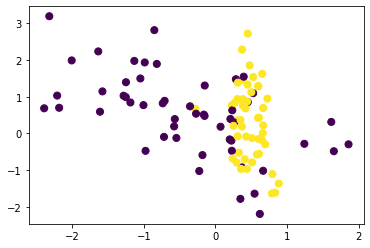

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt


plt.figure()
X, y = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50)
plt.show()

## Création de modèles

**Question**  créer un modèle de régression logistique pour les deux variables.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split




## Visualisation des prédictions

In [ ]:
import numpy as np

def visualisation_predictions(clf, X, y, X_test, y_test, title, subplot, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))

    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)

    if plot_decision_regions:
        subplot.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    subplot.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    subplot.set_xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    subplot.set_ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        subplot.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    subplot.set_title(title)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        subplot.legend(loc=0, handles=legend_handles)



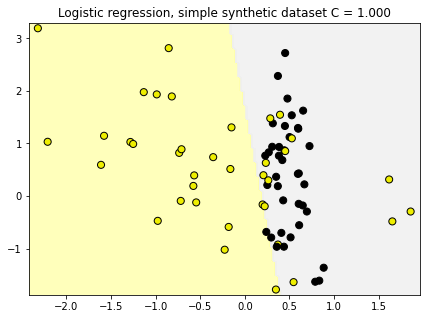

In [ ]:

# vous pouvez appeler votre classifieur clf, la fonction suivante va fonctionner

visualisation_predictions(clf, X_train, y_train,
                                         None, None, title, subaxes)

